<a href="https://colab.research.google.com/github/mayait/ClaseAnalisisDatos/blob/main/DesitionTree/Desition_Tree_2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://kaggle.com/kernels/welcome?src=https://github.com/mayait/ClaseAnalisisDatos/blob/main/DesitionTree/Desition_Tree_2.0.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" width=120 /></a>

<a href="https://colab.research.google.com/github/mayait/ClaseAnalisisDatos/blob/main/DesitionTree/Desition_Tree_2.0.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" width=120 /></a>

In [ ]:
#@title Nombre del estudiante
Estudiante = "" #@param {type:"string"}
Código = "" #@param {type:"string"}

# Árbol de decisión

Imagina que estás planificando las actividades de la próxima semana. Las cosas que harás dependerán en gran medida de si tus amigos tienen tiempo y del tiempo que haga afuera.

![](https://github.com/mayait/ClaseAnalisisDatos/blob/main/DesitionTree/img/tree_1.png?raw=1)

Este cuadro establece reglas de decisión simples, que lo ayudan a decidir qué hacer la próxima semana en función de algunos otros datos. En este caso, es la disponibilidad y las condiciones climáticas de tus amigos.

Los árboles de decisión hacen lo mismo. 

**Construyen un conjunto de reglas de decisión en forma de estructura de árbol, lo que le ayuda a predecir un resultado a partir de los datos de entrada.**

# Terminología
*   Nodo raíz: población completa o muestra
*   Ramificación
*   Nodo de decisión
*   Nodo terminal y hoja
*   Poda
*   Rama/sub-árbol
*   Nodos padre e hijo
![](https://julianmaya.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F43100fb8-8de3-4c6e-9828-d368ea194cba%2FUntitled.png?table=block&id=13a29d59-7a16-4b1f-b9b6-d3760d80cbf1&spaceId=42f304d0-48ef-446b-8385-5c22fd3187f7&width=2000&userId=&cache=v2)


## **Tipos de árboles**

Los árboles se pueden clasificar en dos tipos que son:

1. Árboles de regresión en los cuales la variable respuesta y es cuantitativa.
    
2. Árboles de clasificación en los cuales la variable respuesta y es cualitativa.

![https://fhernanb.github.io/libro_mod_pred/images/tipos_arboles.png](https://fhernanb.github.io/libro_mod_pred/images/tipos_arboles.png)

## Árbol de regresión

![https://fhernanb.github.io/libro_mod_pred/images/ilustracion_arb_regresion.png](https://fhernanb.github.io/libro_mod_pred/images/ilustracion_arb_regresion.png)

## Árbol de clasificación

![https://fhernanb.github.io/libro_mod_pred/images/ilustracion_arb_clasi.png](https://fhernanb.github.io/libro_mod_pred/images/ilustracion_arb_clasi.png)

## Explicación corta

https://www.youtube.com/embed/ZVR2Way4nwQ


## Ventajas

Existen múltiples razones por las que los árboles de decisión son uno de los algoritmos de aprendizaje automático de referencia en las aplicaciones de la vida real:

- Intuitivo
- Informativo
- Escalable
- Util en exploración de datos: identificar importancia de variables a partir de cientos de variables.
- Menos limpieza de datos: outliers y valores faltantes no influencian el modelo (A un cierto grado)
-  El tipo de datos no es una restricción

## Desventajas

- Sobreajuste
- Pérdida de información al categorizar variables continuas
- Inestabilidad: un pequeño cambio en los datos puede modificar ampliamente la estructura del árbol. Por lo tanto la interpretación no es tan directa como parece.

## Business Use-Cases

Los árboles de decisión imitan la toma de decisiones humana y, por lo tanto, se pueden usar en una variedad de entornos comerciales.
Las empresas suelen utilizarlos para predecir resultados futuros. Por ejemplo:

- ¿Qué cliente se mantendrá fiel y cuál abandonará? (Árbol de decisión de clasificación)
- ¿En cuánto podemos aumentar las ventas de un cliente, dadas sus opciones de productos? (Árbol de decisión de regresión)
- ¿Qué artículo debo recomendar a los lectores de mi blog a continuación? (Árboles de decisión de clasificación)


____

First we need to learn how to **choose the root** node and here we need to learn one of the criteria to decide the nodes, **Gini Impurity.**

![Untitled](https://julianmaya.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Fa9db87d4-40a5-4cdb-804c-89d6eb87de8c%2FUntitled.png?table=block&id=36ecea21-1799-49c4-bf8a-304e39c3be1a&spaceId=42f304d0-48ef-446b-8385-5c22fd3187f7&width=2000&userId=&cache=v2)

## **Overfitting o sobreajuste**

![](https://live.staticflickr.com/65535/48057305423_0653b5e58f_b.jpg)

---
# Ejercicio 1

Dataset: [Credit](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

**Source:**

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

**Data Set Information:**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.There are four datasets:1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Attribute Information:**

```
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown') # related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. # other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') # social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descargar el archivo automaticamente 
!wget https://raw.githubusercontent.com/mayait/ClaseAnalisisDatos/main/DesitionTree/data/deposit.csv

--2022-04-11 03:43:00--  https://raw.githubusercontent.com/mayait/ClaseAnalisisDatos/main/DesitionTree/data/deposit.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 390609 (381K) [text/plain]
Saving to: ‘deposit.csv.1’

deposit.csv.1       100%[===================>] 381.45K  --.-KB/s    in 0.03s   

2022-04-11 03:43:00 (11.3 MB/s) - ‘deposit.csv.1’ saved [390609/390609]



## 1. 

> Importe el archivo deposit.csv en un dataframe llamado *df*




In [ ]:
df = ____

## 2. 

> ¿Qué puedes decir sobre la forma del dataframe?

> ¿Que porcentaje de clientes se han suscrito en un deposito a plazo y cuantos no lo han hecho?





In [3]:
# Tip: Pruebe la funcion value_counts() sobre cualquier columna

no     4629
yes    1504
Name: y, dtype: int64

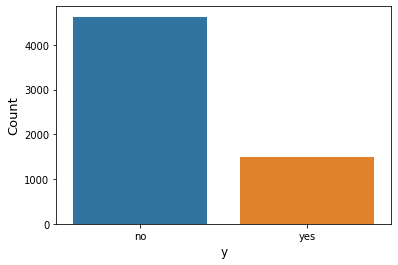

In [7]:
sns.countplot(x = 'y', data=df)
plt.xlabel('y', fontsize=12)
plt.ylabel('Count', fontsize=13)
plt.show()

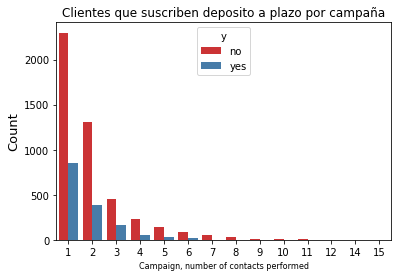

In [42]:
sns.countplot(x=df.campaign, hue=df.y, palette='Set1')
plt.title('Clientes que suscriben deposito a plazo por campaña')
plt.xlabel('Campaign, number of contacts performed', fontsize=8)
plt.ylabel('Count', fontsize=13)
plt.show()

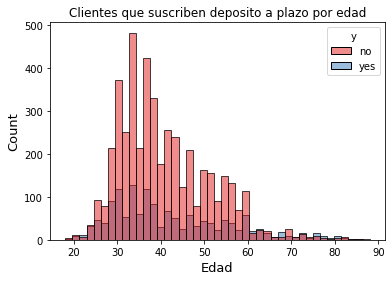

In [41]:
sns.histplot(x=df.age, hue=df.y, palette='Set1')
plt.title('Clientes que suscriben deposito a plazo por edad')
plt.xlabel('Edad', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

## 3.


> Analiza mediante histogramas la distribución en edad, y otro para balance, intenta que en un mismo histograma puedas separar los valores si y no.
No olvides marcar los ejes y el titulo





In [ ]:
sns.histplot(x=___, hue=___, palette='Set1')
plt.title('__')
plt.xlabel('__')
plt.ylabel('__')
plt.show()

# 4.
Utiliza un pairplot para comprar la relación entre todas las variables numericas.


In [ ]:
sns.pairplot(df, hue='__',palette='Set1', diag_kind = 'kde',)

# 5.

¿Hay correlación entre las variables? 

Confirma con un diagrama de coeficientes de correlación

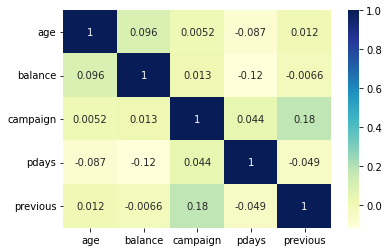

In [51]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# Entrenemos un árbol de decisión

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.tree import export_graphviz

df.sample(10)

,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,y
2619,38,blue-collar,single,primary,no,0,yes,yes,1,290,1,failure,no
289,30,management,married,tertiary,no,314,no,no,2,175,2,success,no
5138,52,technician,married,secondary,no,117,no,no,3,186,6,success,yes
4062,34,technician,married,secondary,no,603,yes,no,4,434,1,failure,no
324,46,blue-collar,married,secondary,no,15,yes,yes,2,91,3,failure,no
2768,30,student,single,secondary,no,948,yes,no,1,370,2,failure,no
2814,42,blue-collar,married,secondary,no,1449,yes,no,1,173,1,failure,no
5402,19,student,single,primary,no,608,no,no,1,180,2,success,yes
79,52,technician,married,secondary,no,1818,no,yes,2,111,4,failure,no
830,32,blue-collar,single,secondary,no,160,yes,no,1,265,1,failure,no


# 6.

> ¿Cuantas categorias tiene la variable job?

> ¿Cúal es la categoria con mayor frecuencia?



```python
# Puede usar la función value_counts():
dataframe.columna.value_counts()
```




In [67]:
# 6.
# dataframe.columna.value_counts()



management       1385
blue-collar      1170
technician       1008
admin.            825
services          514
retired           382
self-employed     210
entrepreneur      175
unemployed        173
student           168
housemaid         123
Name: job, dtype: int64

## 7.

¿Que tipo de dato tiene cada columna? Recuerda el método ```dtypes```

In [ ]:
# 7
# dtypes

### Separar variables categoricas en dummies

In [70]:
df_dummies = pd.get_dummies(data=df, drop_first=True)

Index(['age', 'balance', 'campaign', 'pdays', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'default_yes',
       'housing_yes', 'loan_yes', 'poutcome_success', 'y_yes'],
      dtype='object')

In [72]:
# ¿que columnas nuevas tiene df_dummies?
df_dummies.columns

Index(['age', 'balance', 'campaign', 'pdays', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'default_yes',
       'housing_yes', 'loan_yes', 'poutcome_success', 'y_yes'],
      dtype='object')

In [74]:
df_dummies.sample(5)

,age,balance,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,poutcome_success,y_yes
3404,36,568,3,364,2,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3251,34,529,1,351,3,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
273,53,1139,1,186,6,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
5229,72,4657,1,91,8,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
3650,32,33,1,368,4,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


# 8.
Asigna a la variable ```y``` la columna convertida en númerica que guarda el resultado de que el cliente acepta un deposito a termino. Es decir asigna a la variable y la columna y convertida en dummies.

In [71]:
y = _______

9. Asigna

In [82]:
+X.sample(4)

,age,balance,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,poutcome_success
5855,55,8304,1,92,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4664,35,5007,1,90,3,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3908,56,935,1,96,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
513,51,6659,2,189,1,0,1,0,0,0,...,0,0,1,0,0,1,0,1,1,0


In [88]:
# model = DecisionTreeClassifier( max_depth=4)
# model = DecisionTreeClassifier( max_leaf_nodes=5, max_depth=4)
model = DecisionTreeClassifier()

model.fit(X,y)

DecisionTreeClassifier()

In [89]:
col_names_list = list(X.columns.values)
print ("X: ", col_names_list)

X:  ['age', 'balance', 'campaign', 'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'default_yes', 'housing_yes', 'loan_yes', 'poutcome_success']


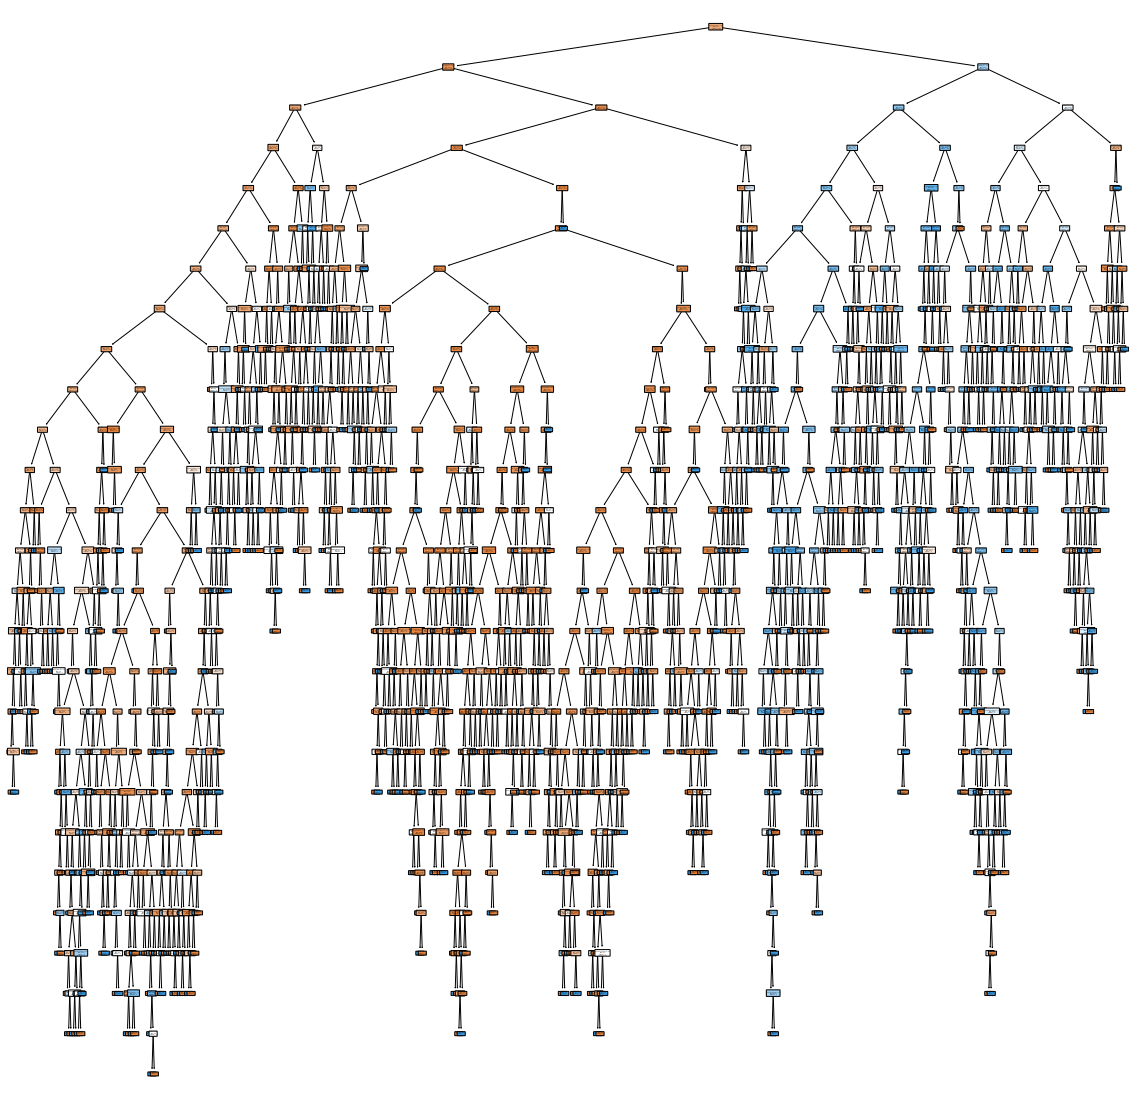

In [90]:
fig = plt.figure(figsize=(20,20))
tree.plot_tree(model, filled=True, rounded=True,  feature_names=col_names_list)
plt.show()

In [87]:
# Export to pdf
export_graphviz(model, out_file='tree.dot', filled=True, 
               rounded=True, special_characters=True, feature_names=col_names_list)

# Convertimos el arbol en Imagen
! dot -Tpdf tree.dot -o tree.pdf
! dot -Tpng tree.dot -o tree.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.655432 to fit


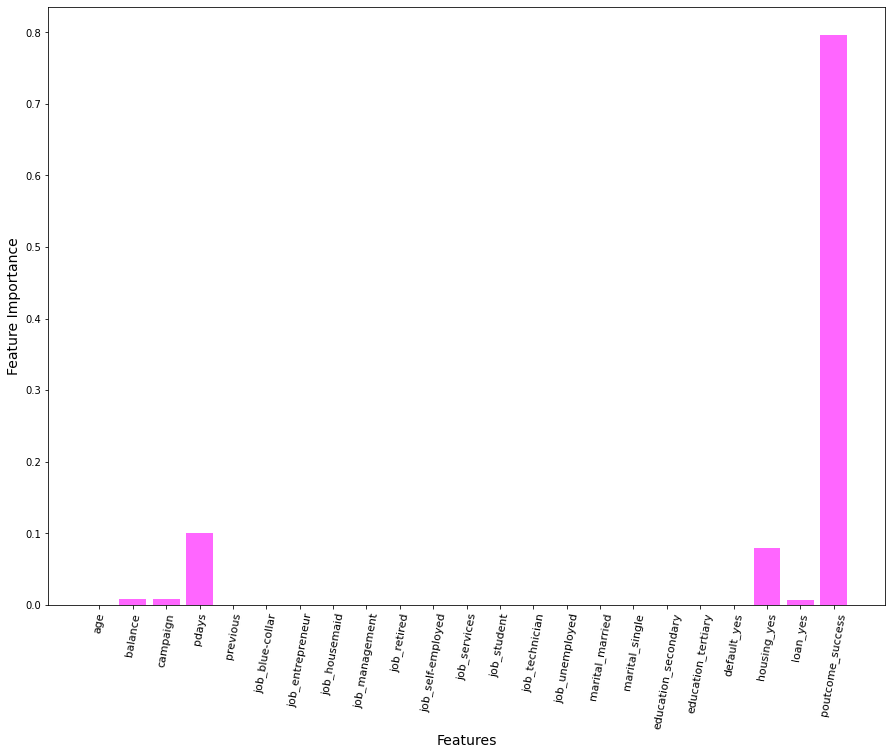

In [ ]:
n_features = len(col_names_list)

fig = plt.figure(figsize=(15, 11))
fig.tight_layout()
plt.bar(range(n_features), model.feature_importances_, color="magenta", align="center", alpha=0.6)
plt.xticks(np.arange(n_features), col_names_list, rotation=80, fontsize=11)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Feature Importance", fontsize=14)
plt.savefig("Feature_Importance.png", dpi=300, bbox_inches='tight')# xticks are not clipped with 'bbox'

### Calculemos la probabilidad de un cliente aleatorio

In [107]:
# Valor aleatorio
a = X.sample(1)
a

,age,balance,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,poutcome_success
891,28,24,2,196,2,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [108]:
model.predict_proba(a)

array([[1., 0.]])

In [110]:
print( "Si acepta el deposito: ", model.predict_proba(a)[0][1])

Si acepta el deposito:  0.0


## Question 3



Look back at the plot of the decision tree with default parameters and answer the following questions. 



1.   How do you interpret the first splitting condition derived by Python? What is the influence of the split on the impurity of the samples?
2.   Which category of samples is most easily seperated from the rest? Explain briefly. 



Text exercise 3.1 

Text exercise 3.2